In [2]:
# Approximate noisy sin data using Neural Net

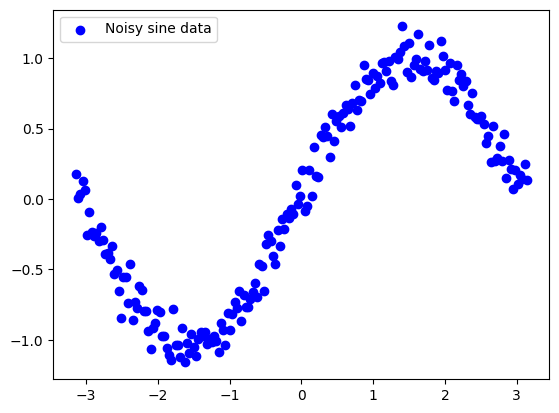

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate noisy sine data
np.random.seed(0)  # For reproducibility
x = np.linspace(-np.pi, np.pi, 200).reshape(-1, 1)  # Reshape for matrix operations
y_true = np.sin(x) + np.random.normal(0, 0.1, x.shape)

# Plot the noisy sine data
plt.scatter(x, y_true, color='blue', label='Noisy sine data')
plt.legend()
plt.show()


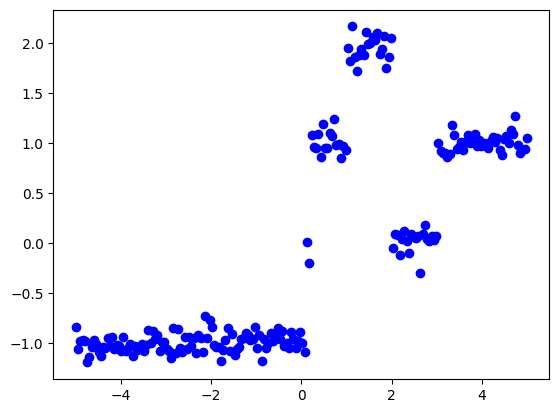

In [30]:
# generate a step function that goes both up and then back down for the neural net
def step_function(x):
    return 1 * (x > 0.2) - 1 * (x < 0.1) + 1 *(x > 1) - 2 * (x > 2) + 1 * (x > 3) 
# generate noisy data for the function that goes both up and then back down for the neural net
x = np.linspace(-5, 5, 200).reshape(-1, 1)  # Reshape for matrix operations
y_true = step_function(x) + np.random.normal(0, 0.1, x.shape)
# plot the noisy data
plt.scatter(x, y_true, color='blue', label='Noisy step data')



In [31]:
n_input = 1  # Number of input neurons (1 for x)
n_hidden = 10  # Number of hidden neurons
n_output = 1  # Number of output neurons (1 for y)

# Randomly initialize weights and biases
W1 = np.random.randn(n_input, n_hidden)
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output)
b2 = np.zeros((1, n_output))
shapes = [W1.shape, b1.shape, W2.shape, b2.shape]
print('Shapes:', shapes)

Shapes: [(1, 10), (1, 10), (10, 1), (1, 1)]


Epoch 0, Loss: 3.041278657883751
Epoch 1000, Loss: 0.1031898540137185
Epoch 2000, Loss: 0.10007259298743264
Epoch 3000, Loss: 0.09825815553078351
Epoch 4000, Loss: 0.0973756144403551
Epoch 5000, Loss: 0.09684328020431344
Epoch 6000, Loss: 0.09651165580930147
Epoch 7000, Loss: 0.09626008759864982
Epoch 8000, Loss: 0.09604799847643614
Epoch 9000, Loss: 0.09590375626869635


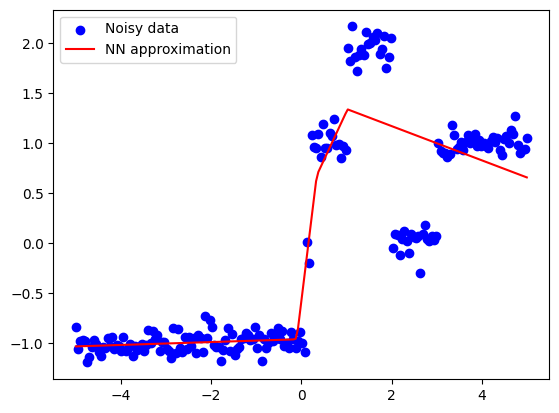

In [32]:
def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return (z > 0).astype(float)

learning_rate = 0.01
n_epochs = 10000

for epoch in range(n_epochs):
    # Forward pass
    Z1 = x.dot(W1) + b1
    A1 = relu(Z1)
    Z2 = A1.dot(W2) + b2
    y_pred = Z2  # No activation function in the output layer for regression
    
    # Compute loss
    loss = np.mean((y_pred - y_true) ** 2) / 2
    
    # Backpropagation
    dZ2 = y_pred - y_true
    dW2 = A1.T.dot(dZ2) / len(x)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(x)
    dZ1 = dZ2.dot(W2.T) * relu_deriv(Z1)
    dW1 = x.T.dot(dZ1) / len(x)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(x)
    
    # Update parameters
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plot the results
plt.scatter(x, y_true, color='blue', label='Noisy data')
plt.plot(x, y_pred, color='red', label='NN approximation')
plt.legend()
plt.show()


Certainly! Backpropagation is a fundamental algorithm for training neural networks, allowing the adjustment of weights and biases in the direction that reduces the error. It involves a forward pass where predictions are made, and a backward pass where gradients are computed for each parameter (weights and biases) based on the loss function. These gradients are then used to update the parameters with the aim of minimizing the loss. Here, we'll go through the backpropagation algorithm in detail for a simple network architecture.

### Network Architecture

Consider a neural network with:
- One input layer
- One hidden layer with a non-linear activation function (e.g., ReLU or sigmoid)
- One output layer

### Forward Pass

1. **Input to Hidden Layer**: The input \(x\) is multiplied by the weights \(W_1\) and added to the bias \(b_1\), and then passed through an activation function \(f\) to produce the output of the hidden layer \(h\).
   
  
   $$  z_1 = xW_1 + b_1  $$
   $$  h = f(z_1)  $$

2. **Hidden Layer to Output**: The output of the hidden layer \(h\) is then multiplied by another set of weights \(W_2\) and added to the bias \(b_2\) to produce the final output \(y\).

   $$ z_2 = hW_2 + b_2 $$
   $$ \hat{y} = f(z_2) $$

### Loss Function

The loss function \(L\) measures the difference between the predicted output \(\hat{y}\) and the actual output \(y\). A common choice is the Mean Squared Error (MSE):

$$L = \frac{1}{2}(\hat{y} - y)^2 $$

### Backpropagation

Backpropagation computes the gradient of the loss function with respect to each weight and bias in the network. This involves applying the chain rule to find these gradients.

1. **Output Layer to Hidden Layer**:
   
   Compute the gradient of the loss function with respect to the weights \(W_2\) and biases \(b_2\).

   $$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z_2} \cdot \frac{\partial z_2}{\partial W_2} $$
   
   $$\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z_2} \cdot \frac{\partial z_2}{\partial b_2} $$

   Since 
   $$ \frac{\partial L}{\partial \hat{y}} = (\hat{y} - y) $$
   and assuming (f) is the sigmoid function, 
   $$ \frac{\partial \hat{y}}{\partial z_2} = f(z_2)(1-f(z_2))$$
    and 
    $$\frac{\partial z_2}{\partial W_2} = h $$
    , we can substitute these into the equations.

2. **Hidden Layer to Input Layer**:

   Compute the gradient of the loss function with respect to the weights \(W_1\) and biases \(b_1\).
   
   $$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial h} \cdot \frac{\partial h}{\partial z_1} \cdot \frac{\partial z_1}{\partial W_1} $$
   
   $$\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial h} \cdot \frac{\partial h}{\partial z_1} \cdot \frac{\partial z_1}{\partial b_1} $$

   Here, 
   $\frac{\partial L}{\partial h} $ involves the chain rule through the output layer and depends on \(W_2\), and 
    $ \frac{\partial h}{\partial z_1} = f'(z_1)$ , where \(f'\) is the derivative of the activation function.

### Parameter Update

After computing the gradients, update each parameter by subtracting the product of the gradient and the learning rate (\(\alpha\)) from the current value of the parameter:

$$W_{new} = W_{old} - \alpha \cdot \frac{\partial L}{\partial W} $$

$$b_{new} = b_{old} - \alpha \cdot \frac{\partial L}{\partial b} $$

This process is repeated for many iterations over the training dataset until the loss converges to a minimum value.

### Summary

Backpropagation is essentially about computing the gradients of the loss function with respect to

 each parameter in the network and using these gradients to update the parameters in a way that minimizes the loss. This explanation simplifies many details and assumes specific choices for activation functions and loss functions, but the core principles apply across different network architectures and functions.